Sng Kai Qin Elvis, U2020218L

Har Jing Daryl, U2020239J

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
sb.set()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# CZ1115 Mini Project

Welcome to our CZ1115 Mini Project! 

The stock market is a well-known mechanism to increase one's wealth at a time of high inflation rates. During "bull markets", participants in the global ecnonomy can stand a chance to win insane amounts of money, depending on one's appetite for risk.

During this time, Donald Trump also shot to fame when he was successfully elected as President of the United States on November 8, 2016. A staunch businessman, Donald Trump swore to bring success back to the businesses, and he was quite successful in doing so. During his presidency, the United States enjoyed fantastic stock market returns, with many market indexes reaching all-time highs. This made him very popular with certain groups of the middle and upper class.

However, his presidency was also marked with increased volatility in the market. On more than one occasion, the actions of President Trump's administration had direct effects on the market, and some of his own statements often led markets to wild selling and buying.

Increased volatility helps increase the chances of everyday retail investors earning. How can someone use this to their own advantage?

### Problem

This Jupyter Notebook aims to explore the actions of people in power and determine if their words and actions can often have direct impacts on the market. It will also be possible to explore any implications from this, such as abuse of power and stock manipulation which are unethical and more importantly, illegal.

We will be using Alpha Vantage as the main API for getting information on the stock market, as well as an external dataset for Trump's tweets (President Trump was very fond of using Twitter, so it is a good source of getting any statements made by him).

---

## Stock Market

We will be using Alpha Vantage to explore the Stock Market.

For our problem, we have chosen to use DIA, which is a popular ETF that tracks the Dow Jones Index. The Dow Jones index tracks the performance of 30 leading companies in the US.

In [2]:
# Using Alpha Vantage API
from alpha_vantage.timeseries import TimeSeries

# We get time series data for DIA, an ETF tracking the Dow Jones index.
ts = TimeSeries(key="1M4IUIIC5KR2DSYT", output_format="pandas", indexing_type="date")
stock_ts, _ = ts.get_daily_adjusted(symbol="DIA", outputsize="full")
stock_ts.reset_index(inplace=True)  # Bring date to column

In [3]:
import datetime

# We convert date column to time series
stock_ts["date"] = pd.to_datetime(stock_ts["date"], format="%Y-%m-%d")

# We only select days after Trump's first tweet until the end of Trump's presidency
stock_ts = stock_ts[::-1].reset_index(drop=True)  # Earliest tweets first.

# Selecting only relevant columns and renmaing them to something better.
stock_ts = stock_ts.loc[:, ["date", "1. open", "4. close", "5. adjusted close", "6. volume"]]
stock_ts.columns = ["date", "open", "close", "adjusted_close", "volume"]

stock_ts

date    open   close  adjusted_close     volume
0    1999-11-01  107.50  106.50       66.159263   559800.0
1    1999-11-02  107.00  105.70       65.662292   975300.0
2    1999-11-03  106.80  106.20       65.972899  1025500.0
3    1999-11-04  107.00  106.60       66.221384   578600.0
4    1999-11-05  108.00  107.50       66.780476  1139100.0
...         ...     ...     ...             ...        ...
5390 2021-04-06  334.69  334.37      334.370000  2987511.0
5391 2021-04-07  334.14  334.37      334.370000  2658526.0
5392 2021-04-08  334.30  335.13      335.130000  2664978.0
5393 2021-04-09  335.72  337.86      337.860000  3034682.0
5394 2021-04-12  337.26  337.55      337.550000  2951503.0

[5395 rows x 5 columns]

In [4]:
stock_ts.dtypes

date              datetime64[ns]
open                     float64
close                    float64
adjusted_close           float64
volume                   float64
dtype: object

In [5]:
f = plt.figure(figsize=(16, 9))
fig = go.Figure([go.Scatter(x=stock_ts["date"], y=stock_ts["close"])])
fig.show()

<Figure size 1152x648 with 0 Axes>

You may explore a specific area of the time series by highlighting a particular area. You can also move the x and y axis if you need to do so.

Note that the data does not provide intra-day prices (price movements within a day).

### Exploration
Were there any differences in the market before and during Trump's presidency?

In [6]:
# Finding days where the market increased or decreased.
stock_ts["increased"] = stock_ts["close"] > stock_ts["open"]

# Finding percentage change between days
stock_ts["prct_change"] = (stock_ts["close"] - stock_ts["open"]) / stock_ts["open"] * 100
stock_ts["abs_prct_change"] = abs(stock_ts["prct_change"])

stock_ts

date    open   close  adjusted_close     volume  increased  \
0    1999-11-01  107.50  106.50       66.159263   559800.0      False   
1    1999-11-02  107.00  105.70       65.662292   975300.0      False   
2    1999-11-03  106.80  106.20       65.972899  1025500.0      False   
3    1999-11-04  107.00  106.60       66.221384   578600.0      False   
4    1999-11-05  108.00  107.50       66.780476  1139100.0      False   
...         ...     ...     ...             ...        ...        ...   
5390 2021-04-06  334.69  334.37      334.370000  2987511.0      False   
5391 2021-04-07  334.14  334.37      334.370000  2658526.0       True   
5392 2021-04-08  334.30  335.13      335.130000  2664978.0       True   
5393 2021-04-09  335.72  337.86      337.860000  3034682.0       True   
5394 2021-04-12  337.26  337.55      337.550000  2951503.0       True   

      prct_change  abs_prct_change  
0       -0.930233         0.930233  
1       -1.214953         1.214953  
2       -0.561798         0.561798  
3       -0.373832         0.373832  
4       -0.462963         0.462963  
...           ...              ...  
5390    -0.095611         0.095611  
5391     0.068833         0.068833  
5392     0.248280         0.248280  
5393     0.637436         0.637436  
5394     0.085987         0.085987  

[5395 rows x 8 columns]

In [7]:
# Getting market data during Obama's 2nd term
obama_start = datetime.datetime(year=2013, month=1, day=20)
obama_end = datetime.datetime(year=2017, month=1, day=20)
obama_market = stock_ts.loc[(obama_start <= stock_ts["date"]) & (stock_ts["date"] < obama_end), :].reset_index(drop=True)

# Getting market data during Trump's term
trump_start = obama_end
trump_end = datetime.datetime(year=2021, month=1, day=20)
trump_market = stock_ts.loc[(trump_start <= stock_ts["date"]) & (stock_ts["date"] <= trump_end), :].reset_index(drop=True)

In [8]:
obama_market["prct_change"].describe()

count    1007.000000
mean        0.025283
std         0.593387
min        -4.187841
25%        -0.258138
50%         0.046867
75%         0.351419
max         2.637979
Name: prct_change, dtype: float64

In [9]:
trump_market["prct_change"].describe()

count    1007.000000
mean       -0.002178
std         0.896273
min        -5.602833
25%        -0.294964
50%         0.040663
75%         0.365499
max         5.283538
Name: prct_change, dtype: float64

In studies of the Stock Market, the Standard Deviation is often used as the primary measure of market volatility. 

Comparing the Standard Deviations for percentage change, we can see that the market for Trump had a volatility that was a little higher than Obama.

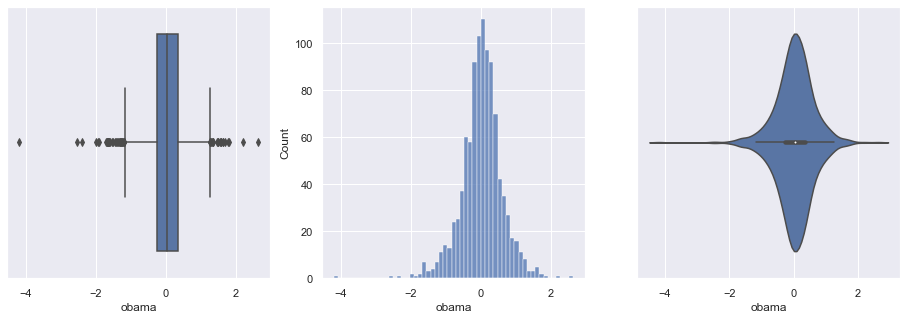

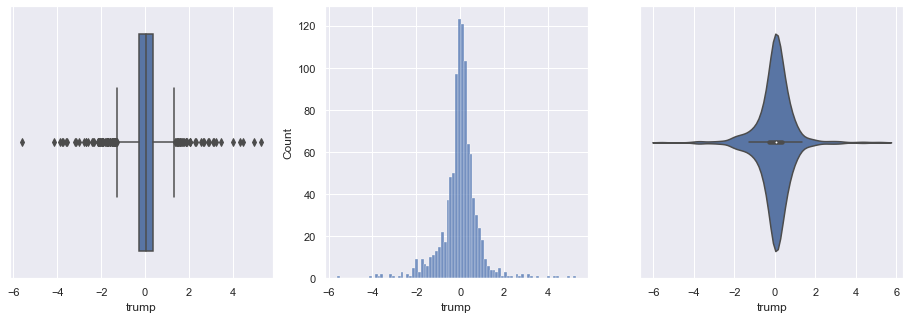

In [10]:
# Plotting basic statistical plots for percentage change
obama_prct_change = obama_market["prct_change"]
trump_prct_change = trump_market["prct_change"]
p_change = pd.concat([obama_prct_change, trump_prct_change], axis=1)
p_change.columns = ["obama", "trump"]

for col in p_change.columns:
    f, axes = plt.subplots(1, 3, figsize=(16, 5))
    sb.boxplot(x=p_change[col], orient="h", ax=axes[0])
    sb.histplot(x=p_change[col], ax=axes[1])
    sb.violinplot(x=p_change[col], ax=axes[2])

<AxesSubplot:>

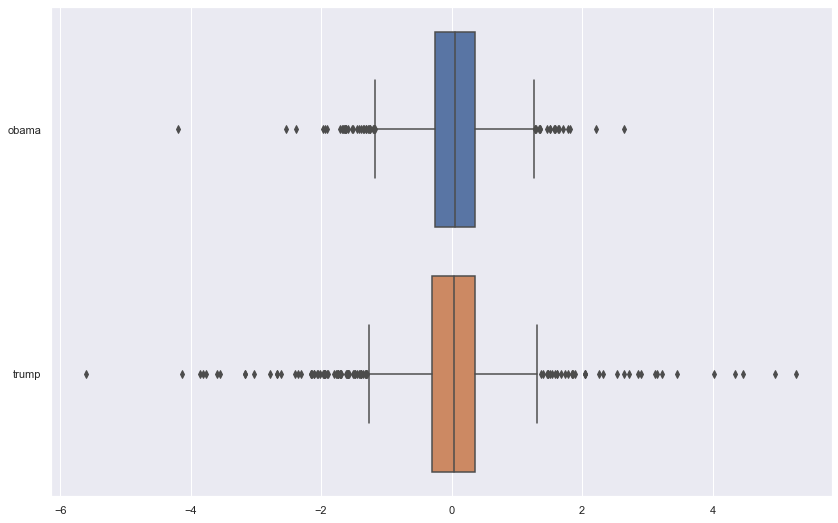

In [11]:
# In particular, we are interested to see the boxplots of the distribution
f = plt.figure(figsize=(14, 9))
sb.boxplot(data=p_change, orient="h")

In [12]:
def count_outliers(data):
    """Count outliers in data."""
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = (q3 - q1)
    return data.loc[(data < (q1 - 1.5*iqr)) | (data > (q3 + 1.5*iqr))].count()

print("Outliers for Obama:", count_outliers(obama_prct_change))
print("Outliers for Trump:", count_outliers(trump_prct_change))

Outliers for Obama: 52
Outliers for Trump: 102


There are about twice for outliers for percentage change in the market during Trump's presidency!

Apart from the S&P 500, there are also many other leading indexes in the US, such as the Nasdaq Composite and Dow Jones.

## Donald Trump's tweets

The dataset from https://www.thetrumparchive.com/ provides a full list of Donald Trump's tweets.

### Extraction

In [13]:
# Import Trump's tweets
trump_tweets = pd.read_csv("tweets_01-08-2021.csv")

In [14]:
# Convert the date column to time series and only keep the date.
trump_tweets["date"] = pd.to_datetime(trump_tweets["date"], format="%Y-%m-%d %H:%M:%S").dt.normalize()
trump_tweets.sort_values(by=["date"], ascending=True, inplace=True)

# Selecting only relevant columns
trump_tweets = trump_tweets.loc[:, ["date", "text", "retweets", "favorites"]]
trump_tweets

date                                               text  retweets  \
13325 2009-05-04  Be sure to tune in and watch Donald Trump on L...       519   
13324 2009-05-05  Donald Trump will be appearing on The View tom...        34   
13323 2009-05-08  Donald Trump reads Top Ten Financial Tips on L...        15   
13322 2009-05-08  New Blog Post: Celebrity Apprentice Finale and...        11   
13321 2009-05-12  """My persona will never be that of a wallflow...      1321   
...          ...                                                ...       ...   
311   2021-01-06  These are the things and events that happen wh...         0   
239   2021-01-06  THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...     66595   
327   2021-01-08  To all of those who have asked, I will not be ...     83532   
316   2021-01-08                            https://t.co/csX07ZVWGe    154877   
323   2021-01-08  The 75,000,000 great American Patriots who vot...    108844   

       favorites  
13325        939  
13324        259  
13323         37  
13322         29  
13321       1877  
...          ...  
311            0  
239       344390  
327       510761  
316       629326  
323       480997  

[56571 rows x 4 columns]

In [15]:
# Separate the dates
trump_tweets["year"] = trump_tweets["date"].apply(lambda date: date.year)
trump_tweets["month"] = trump_tweets["date"].apply(lambda date: date.month)
trump_tweets["day"] = trump_tweets["date"].apply(lambda date: date.day)

### Exploration

<AxesSubplot:xlabel='year', ylabel='favorites'>

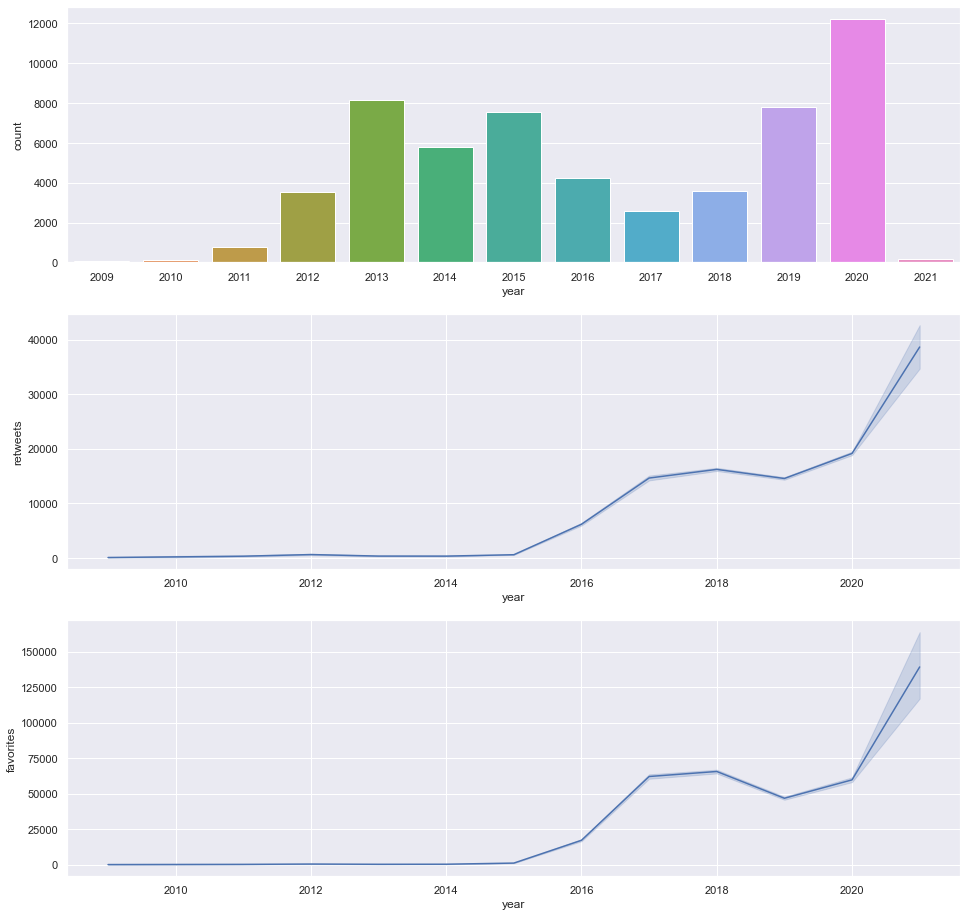

In [16]:
# How many tweets did Donald Trump make per year and how popular were his tweets?
fig, ax = plt.subplots(3, 1, figsize=(16, 16))

sb.countplot(data=trump_tweets, x="year", ax=ax[0])
sb.lineplot(data=trump_tweets, x="year", y="retweets", ax=ax[1])
sb.lineplot(data=trump_tweets, x="year", y="favorites", ax=ax[2])

It seems that Donald Trump's tweets didn't really take off in popularity until 2016, when he became a real contender for President of the United States.

Surprisingly (or not), he seemed to tweet much less as president except for 2019/2020.

Even with half the datapoints for the year of 2020, we can see that there is a significant increase in the number of retweets and favourites for each of his tweets compared to previous years. This coincides with the 2020 Presidential Election.

### Cleaning & Preparation

In [17]:
# Select only relevant columns
trump_tweets = trump_tweets.loc[:, ["date", "text", "retweets", "favorites"]]

# We are only interested in tweets during his presidency
trump_tweets = trump_tweets[(trump_tweets["date"] >= trump_start) & (trump_tweets["date"] <= trump_end)]

# Remove tweets with low character count
trump_tweets = trump_tweets[trump_tweets["text"].str.len() > 30].reset_index(drop=True)
trump_tweets

date                                               text  retweets  \
0     2017-01-20          TO ALL AMERICANS🇺🇸https://t.co/D7Es6ie4fY     13373   
1     2017-01-20  So to all Americans, in every city near and fa...     11530   
2     2017-01-20  What truly matters is not which party controls...     35758   
3     2017-01-20  We will follow two simple rules: BUY AMERICAN ...     31067   
4     2017-01-20  power from Washington, D.C. and giving it back...     14880   
...          ...                                                ...       ...   
24580 2021-01-06  I am asking for everyone at the U.S. Capitol t...    156100   
24581 2021-01-06  These are the things and events that happen wh...         0   
24582 2021-01-06  THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...     66595   
24583 2021-01-08  To all of those who have asked, I will not be ...     83532   
24584 2021-01-08  The 75,000,000 great American Patriots who vot...    108844   

       favorites  
0          78850  
1          74676  
2         157266  
3         139154  
4          78281  
...          ...  
24580     730357  
24581          0  
24582     344390  
24583     510761  
24584     480997  

[24585 rows x 4 columns]

#### VADER-Sentiment-Analysis

VADER is an open-source sentiment analysis tool specifically created for social media posts.

You may find more here: https://github.com/cjhutto/vaderSentiment

In [18]:
# We use the VADER system to get the sentiment of each of Trump's tweets
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

# For VADER, the sentiment analyser will be much more accurate if we do not do any Natural Language Processing (NLP).
analyzer = SentimentIntensityAnalyzer()
def score_tweet(tweet):
    """This function returns the compound score for the sentiment of a tweet.
    Compound scores range from -1 being the most negative to +1 being the most positive."""
    global analyzer
    return analyzer.polarity_scores(tweet)["compound"]

# We store the scores for each tweet in the sentiment_score column
trump_tweets["sentiment"] = trump_tweets["text"].apply(lambda content: score_tweet(content))
trump_tweets

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\elvis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


date                                               text  retweets  \
0     2017-01-20          TO ALL AMERICANS🇺🇸https://t.co/D7Es6ie4fY     13373   
1     2017-01-20  So to all Americans, in every city near and fa...     11530   
2     2017-01-20  What truly matters is not which party controls...     35758   
3     2017-01-20  We will follow two simple rules: BUY AMERICAN ...     31067   
4     2017-01-20  power from Washington, D.C. and giving it back...     14880   
...          ...                                                ...       ...   
24580 2021-01-06  I am asking for everyone at the U.S. Capitol t...    156100   
24581 2021-01-06  These are the things and events that happen wh...         0   
24582 2021-01-06  THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...     66595   
24583 2021-01-08  To all of those who have asked, I will not be ...     83532   
24584 2021-01-08  The 75,000,000 great American Patriots who vot...    108844   

       favorites  sentiment  
0          78850     0.0000  
1          74676     0.0000  
2         157266     0.0954  
3         139154     0.0000  
4          78281     0.3400  
...          ...        ...  
24580     730357     0.8715  
24581          0     0.8140  
24582     344390     0.8353  
24583     510761     0.0000  
24584     480997     0.9230  

[24585 rows x 5 columns]

In [19]:
# We group the scores by date, so we get the average sentiment of Trump's tweets on each day
tweet_sntmt = trump_tweets.groupby(by="date").mean().loc[:, ["sentiment"]].reset_index()
tweet_sntmt

date  sentiment
0    2017-01-20   0.169685
1    2017-01-21   0.561400
2    2017-01-22   0.244400
3    2017-01-23   0.493900
4    2017-01-24   0.354225
...         ...        ...
1433 2021-01-03   0.101354
1434 2021-01-04   0.173317
1435 2021-01-05   0.159019
1436 2021-01-06   0.159327
1437 2021-01-08   0.461500

[1438 rows x 2 columns]

In [20]:
tweet_sntmt.describe()

sentiment
count  1438.000000
mean      0.185064
std       0.258333
min      -0.966500
25%       0.026489
50%       0.165982
75%       0.346149
max       0.958200

It seems that contrary to popular belief, the President's tweets are mostly positive.

## Predicting the movement of the Stock Market

Given the sentiment value on Trump's tweets, are we able to then predict whether the market will move up or down?

In [21]:
# We join the sentiment scores with the stock market table during Trump's presidency
stock_sntmt = trump_market.merge(tweet_sntmt, left_on="date", right_on="date", how="inner")
stock_sntmt = stock_sntmt.loc[:, ["date", "increased", "sentiment"]]
stock_sntmt

date  increased  sentiment
0   2017-01-20       True   0.169685
1   2017-01-23      False   0.493900
2   2017-01-24       True   0.354225
3   2017-01-25       True   0.058888
4   2017-01-26       True   0.059473
..         ...        ...        ...
989 2020-12-30       True  -0.192286
990 2021-01-04      False   0.173317
991 2021-01-05       True   0.159019
992 2021-01-06       True   0.159327
993 2021-01-08      False   0.461500

[994 rows x 3 columns]

### Decision Tree Classifier

First, we try to predict if we can tell if the market will go up or down based on the sentiment of the tweet.

[Text(697.5, 951.3000000000001, 'sentiment <= 0.865\ngini = 0.493\nsamples = 695\nvalue = [305, 390]\nclass = True'),
 Text(558.0, 679.5, 'sentiment <= 0.666\ngini = 0.492\nsamples = 691\nvalue = [301, 390]\nclass = True'),
 Text(279.0, 407.70000000000005, 'sentiment <= 0.648\ngini = 0.493\nsamples = 673\nvalue = [296, 377]\nclass = True'),
 Text(139.5, 135.89999999999998, 'gini = 0.492\nsamples = 671\nvalue = [294, 377]\nclass = True'),
 Text(418.5, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = False'),
 Text(837.0, 407.70000000000005, 'sentiment <= 0.732\ngini = 0.401\nsamples = 18\nvalue = [5, 13]\nclass = True'),
 Text(697.5, 135.89999999999998, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = True'),
 Text(976.5, 135.89999999999998, 'gini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = False'),
 Text(837.0, 679.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = False')]

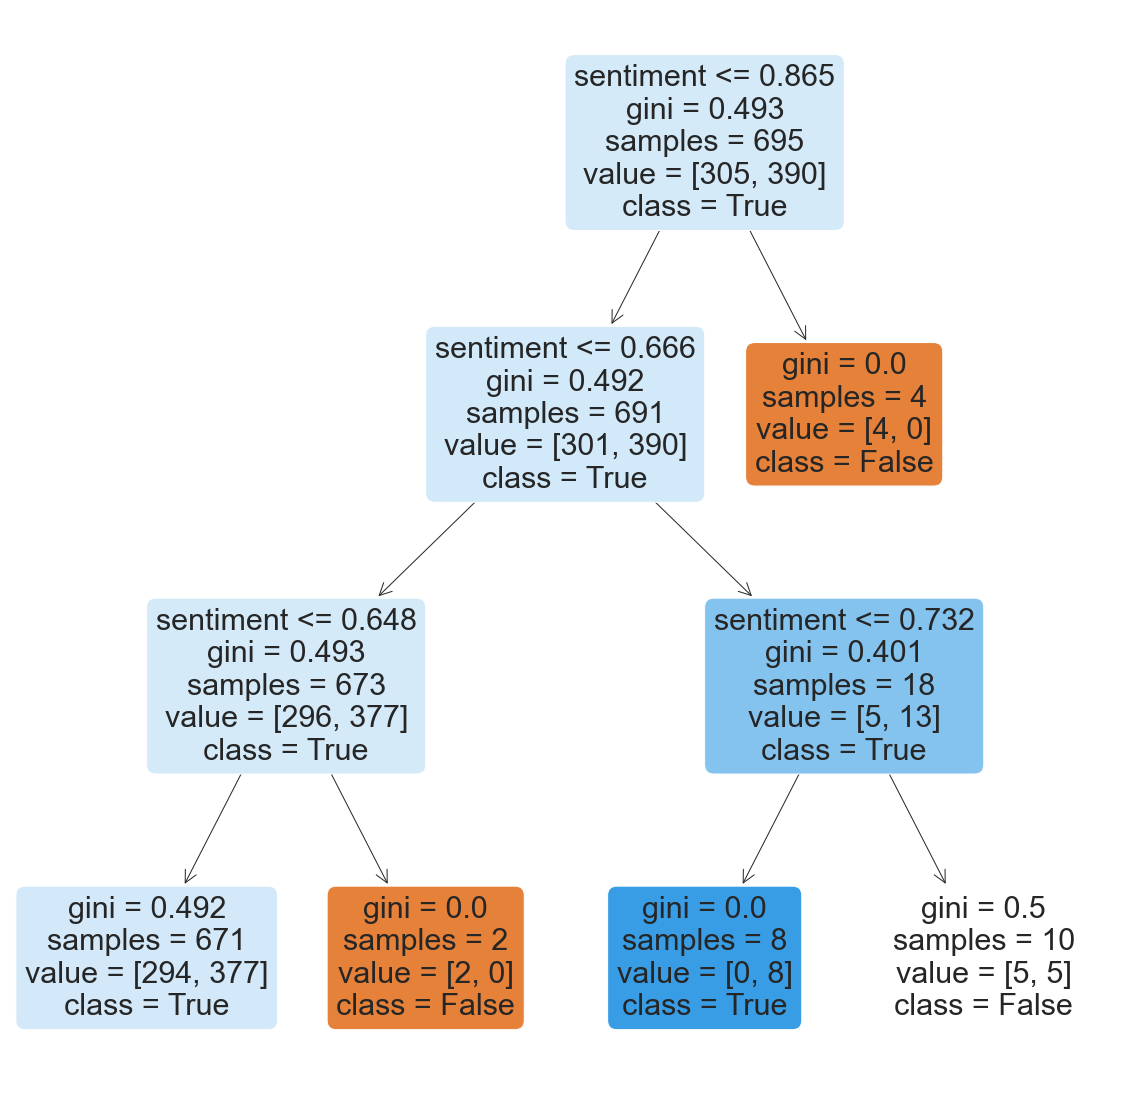

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pd.DataFrame(stock_sntmt["sentiment"]), pd.DataFrame(stock_sntmt["increased"]), train_size=0.7, random_state = 0)
dectree = DecisionTreeClassifier(max_depth=3)
dectree.fit(x_train, y_train)
f = plt.figure(figsize=(20, 20))
plot_tree(dectree, filled=True, rounded=True, feature_names=["sentiment"], class_names=["False", "True"])

Test Classification Accuracy 	: 0.46488294314381273
Train Classification Accuracy 	: 0.5697841726618705


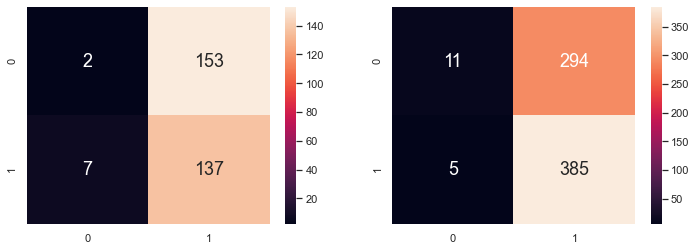

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dectree.predict(x_test)
y_pred_train = dectree.predict(x_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Test Classification Accuracy \t:", accuracy_score(y_test, y_pred))
print("Train Classification Accuracy \t:", accuracy_score(y_train, y_pred_train))

### Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

C:\Users\elvis\anacondafile\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB()

In [25]:
y_pred = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)

Test Classification Accuracy 	: 0.4816053511705686
Train Classification Accuracy 	: 0.5611510791366906


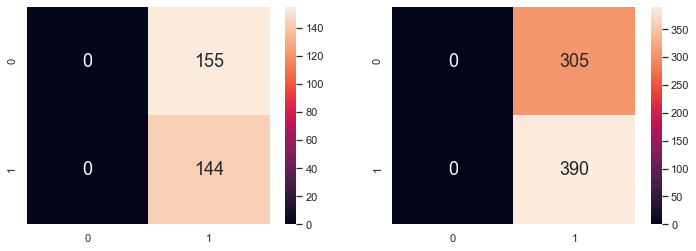

In [26]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Test Classification Accuracy \t:", accuracy_score(y_test, y_pred))
print("Train Classification Accuracy \t:", accuracy_score(y_train, y_pred_train))

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0,max_depth = 3)
classifier.fit(x_train, y_train)

<ipython-input-27-8784b04a746b>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=3, random_state=0)

Test Classification Accuracy 	: 0.47491638795986624
Train Classification Accuracy 	: 0.5712230215827339


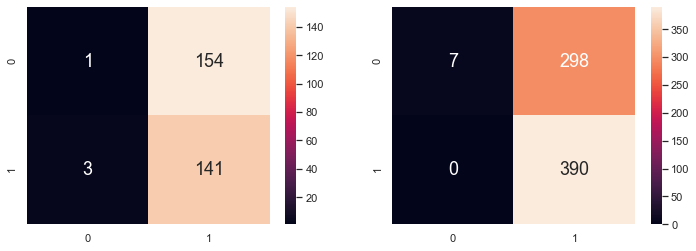

In [28]:
y_pred = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Test Classification Accuracy \t:", accuracy_score(y_test, y_pred))
print("Train Classification Accuracy \t:", accuracy_score(y_train, y_pred_train))

### K-Nearest Neighbors (K-NN)

In [29]:
x_train.shape

(695, 1)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
#optimal number of neighbours is usually around square root of the number of samples
#square root of 695 is around 26, from there we checked what value gave us a better classification accuracy and stopped with 27
classifier = KNeighborsClassifier(n_neighbors = 27)
classifier.fit(x_train, y_train)

C:\Users\elvis\anacondafile\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=27)

Test Classification Accuracy 	: 0.47491638795986624
Train Classification Accuracy 	: 0.5640287769784172


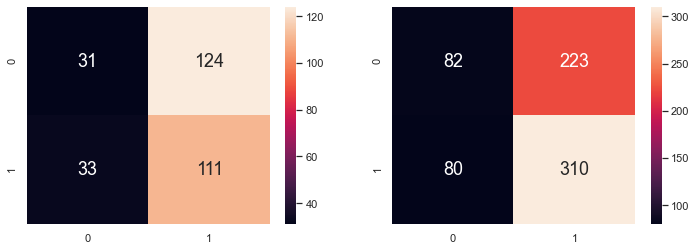

In [31]:
y_pred = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Test Classification Accuracy \t:", accuracy_score(y_test, y_pred))
print("Train Classification Accuracy \t:", accuracy_score(y_train, y_pred_train))

### Support Vector Machine (SVM)

In [32]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\elvis\anacondafile\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(kernel='linear', random_state=0)

Test Classification Accuracy 	: 0.4816053511705686
Train Classification Accuracy 	: 0.5611510791366906


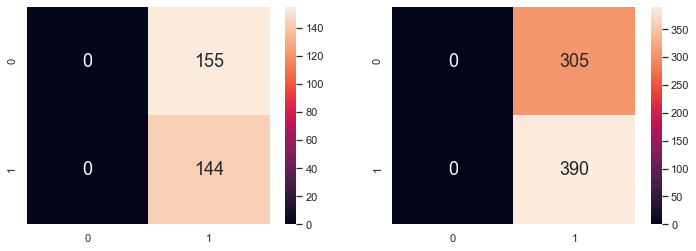

In [33]:
y_pred = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Test Classification Accuracy \t:", accuracy_score(y_test, y_pred))
print("Train Classification Accuracy \t:", accuracy_score(y_train, y_pred_train))

### Kernel SVM

In [34]:
classifier = SVC(random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\elvis\anacondafile\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(random_state=0)

Test Classification Accuracy 	: 0.47491638795986624
Train Classification Accuracy 	: 0.5669064748201439


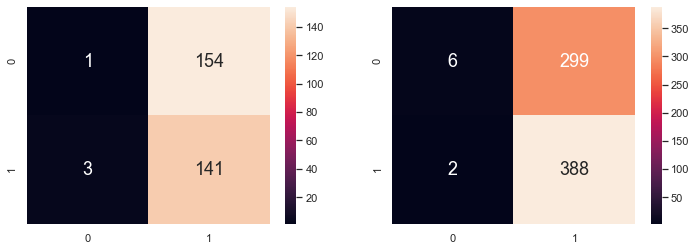

In [35]:
y_pred = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Test Classification Accuracy \t:", accuracy_score(y_test, y_pred))
print("Train Classification Accuracy \t:", accuracy_score(y_train, y_pred_train))

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\elvis\anacondafile\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(random_state=0)

Test Classification Accuracy 	: 0.4816053511705686
Train Classification Accuracy 	: 0.5611510791366906


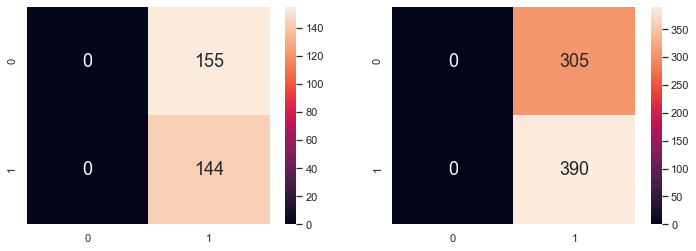

In [37]:
y_pred = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Test Classification Accuracy \t:", accuracy_score(y_test, y_pred))
print("Train Classification Accuracy \t:", accuracy_score(y_train, y_pred_train))

The accuracy of the model is quite bad in general, with almost none of the test classification accuracy going over 0.5.

Many things could have gone wrong:
1. Maybe not all tweets were relevant?
2. Maybe relevant tweets contained irrelevant information which affected the sentiment?
3. Could there have been a positive correlation for certain tweets and a negative correlation for others?
etc...

For starters, we tried clustering tweets to different groups in order to get more relevant tweets. In Natural Language Processing (NLP), classifying words involves quite a number of steps that we will do below.

## Improving Model Performance 

Instead of using all tweets to predict the stock market, we should be using tweets that are relevant. To do that, we will have to do some Natural Language Processing (NLP).

In [38]:
# Before any processing
processed_tweets = trump_tweets.copy(deep=True)
processed_tweets

date                                               text  retweets  \
0     2017-01-20          TO ALL AMERICANS🇺🇸https://t.co/D7Es6ie4fY     13373   
1     2017-01-20  So to all Americans, in every city near and fa...     11530   
2     2017-01-20  What truly matters is not which party controls...     35758   
3     2017-01-20  We will follow two simple rules: BUY AMERICAN ...     31067   
4     2017-01-20  power from Washington, D.C. and giving it back...     14880   
...          ...                                                ...       ...   
24580 2021-01-06  I am asking for everyone at the U.S. Capitol t...    156100   
24581 2021-01-06  These are the things and events that happen wh...         0   
24582 2021-01-06  THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...     66595   
24583 2021-01-08  To all of those who have asked, I will not be ...     83532   
24584 2021-01-08  The 75,000,000 great American Patriots who vot...    108844   

       favorites  sentiment  
0          78850     0.0000  
1          74676     0.0000  
2         157266     0.0954  
3         139154     0.0000  
4          78281     0.3400  
...          ...        ...  
24580     730357     0.8715  
24581          0     0.8140  
24582     344390     0.8353  
24583     510761     0.0000  
24584     480997     0.9230  

[24585 rows x 5 columns]

In [39]:
# Setting all text to lowercase
processed_tweets["ptext"] = processed_tweets["text"].str.lower()

# Removing all punctuation
import string
processed_tweets["ptext"] = processed_tweets["ptext"].apply(lambda c: c.translate(str.maketrans("", "", string.punctuation)))
processed_tweets

date                                               text  retweets  \
0     2017-01-20          TO ALL AMERICANS🇺🇸https://t.co/D7Es6ie4fY     13373   
1     2017-01-20  So to all Americans, in every city near and fa...     11530   
2     2017-01-20  What truly matters is not which party controls...     35758   
3     2017-01-20  We will follow two simple rules: BUY AMERICAN ...     31067   
4     2017-01-20  power from Washington, D.C. and giving it back...     14880   
...          ...                                                ...       ...   
24580 2021-01-06  I am asking for everyone at the U.S. Capitol t...    156100   
24581 2021-01-06  These are the things and events that happen wh...         0   
24582 2021-01-06  THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...     66595   
24583 2021-01-08  To all of those who have asked, I will not be ...     83532   
24584 2021-01-08  The 75,000,000 great American Patriots who vot...    108844   

       favorites  sentiment                                              ptext  
0          78850     0.0000               to all americans🇺🇸httpstcod7es6ie4fy  
1          74676     0.0000  so to all americans in every city near and far...  
2         157266     0.0954  what truly matters is not which party controls...  
3         139154     0.0000  we will follow two simple rules buy american a...  
4          78281     0.3400  power from washington dc and giving it back to...  
...          ...        ...                                                ...  
24580     730357     0.8715  i am asking for everyone at the us capitol to ...  
24581          0     0.8140  these are the things and events that happen wh...  
24582     344390     0.8353  the republican party and more importantly our ...  
24583     510761     0.0000  to all of those who have asked i will not be g...  
24584     480997     0.9230  the 75000000 great american patriots who voted...  

[24585 rows x 6 columns]

Then, we remove emojis from the tweets.

In [40]:
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

processed_tweets["ptext"] = processed_tweets["ptext"].map(remove_emoji)
processed_tweets

date                                               text  retweets  \
0     2017-01-20          TO ALL AMERICANS🇺🇸https://t.co/D7Es6ie4fY     13373   
1     2017-01-20  So to all Americans, in every city near and fa...     11530   
2     2017-01-20  What truly matters is not which party controls...     35758   
3     2017-01-20  We will follow two simple rules: BUY AMERICAN ...     31067   
4     2017-01-20  power from Washington, D.C. and giving it back...     14880   
...          ...                                                ...       ...   
24580 2021-01-06  I am asking for everyone at the U.S. Capitol t...    156100   
24581 2021-01-06  These are the things and events that happen wh...         0   
24582 2021-01-06  THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...     66595   
24583 2021-01-08  To all of those who have asked, I will not be ...     83532   
24584 2021-01-08  The 75,000,000 great American Patriots who vot...    108844   

       favorites  sentiment                                              ptext  
0          78850     0.0000                 to all americanshttpstcod7es6ie4fy  
1          74676     0.0000  so to all americans in every city near and far...  
2         157266     0.0954  what truly matters is not which party controls...  
3         139154     0.0000  we will follow two simple rules buy american a...  
4          78281     0.3400  power from washington dc and giving it back to...  
...          ...        ...                                                ...  
24580     730357     0.8715  i am asking for everyone at the us capitol to ...  
24581          0     0.8140  these are the things and events that happen wh...  
24582     344390     0.8353  the republican party and more importantly our ...  
24583     510761     0.0000  to all of those who have asked i will not be g...  
24584     480997     0.9230  the 75000000 great american patriots who voted...  

[24585 rows x 6 columns]

### Python NLTK package for NLP

The next few steps are more complicated.

First, we remove stopwords from the tweets. Stopwords are words like "a", "the", etc... that often have no bearing on text analysis.

In [41]:
# Remove stopwords from tweets.
from nltk.corpus import stopwords
nltk.download("stopwords")  # Update the list of stopwords

stopword_set = set(stopwords.words("english"))
stopword_set.update({"rt", # For retweets
                     "fake", # Trump likes talking about fake news
                     "news",
                     "realdonaldtrump"
                    })  # Add some custom words into the stopword set that we know we won't need.
def remove_stopwords(c):
    global stopword_set
    return " ".join(word for word in c.split() if word not in stopword_set)

processed_tweets["ptext"] = processed_tweets["ptext"].apply(lambda x: remove_stopwords(x))
processed_tweets

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elvis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


date                                               text  retweets  \
0     2017-01-20          TO ALL AMERICANS🇺🇸https://t.co/D7Es6ie4fY     13373   
1     2017-01-20  So to all Americans, in every city near and fa...     11530   
2     2017-01-20  What truly matters is not which party controls...     35758   
3     2017-01-20  We will follow two simple rules: BUY AMERICAN ...     31067   
4     2017-01-20  power from Washington, D.C. and giving it back...     14880   
...          ...                                                ...       ...   
24580 2021-01-06  I am asking for everyone at the U.S. Capitol t...    156100   
24581 2021-01-06  These are the things and events that happen wh...         0   
24582 2021-01-06  THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...     66595   
24583 2021-01-08  To all of those who have asked, I will not be ...     83532   
24584 2021-01-08  The 75,000,000 great American Patriots who vot...    108844   

       favorites  sentiment                                              ptext  
0          78850     0.0000                        americanshttpstcod7es6ie4fy  
1          74676     0.0000  americans every city near far small large moun...  
2         157266     0.0954  truly matters party controls government whethe...  
3         139154     0.0000  follow two simple rules buy american amp hire ...  
4          78281     0.3400  power washington dc giving back american peopl...  
...          ...        ...                                                ...  
24580     730357     0.8715  asking everyone us capitol remain peaceful vio...  
24581          0     0.8140  things events happen sacred landslide election...  
24582     344390     0.8353  republican party importantly country needs pre...  
24583     510761     0.0000              asked going inauguration january 20th  
24584     480997     0.9230  75000000 great american patriots voted america...  

[24585 rows x 6 columns]

Next, we do stemming. Stemming reduces inflected words to their base meaning by removing typical inflections such as "-ing" or "-ed" to give the base meaning of the word. For example, "jumped" would be changed to "jump". 

Because PorterStemmer does not check if root words belong to the same language, we will use Lemmatisation instead. They are both similar apart from the fact that lemmatisation ensures that root words exist and they have the added benefit of tagging words as nouns, adjectives etc... which will help increase the accuracy of our language processing

In [42]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")

lem = WordNetLemmatizer()
# We have to provide lemmas for the lemmatiser to work properly.
# For example, we need to tag words as nouns/verbs etc.
mapp = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
def lemmatising(c):
    global lem
    global mapp
    tagged = nltk.pos_tag(c.split())
    # Use the first character in the tag to get correct lemma. By default, will be considered noun.
    return " ".join(lem.lemmatize(word, mapp.get(t[0], wordnet.NOUN)) for word, t in tagged)

processed_tweets["lemmed"] = processed_tweets["ptext"].apply(lambda c: lemmatising(c))
processed_tweets

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elvis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\elvis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


date                                               text  retweets  \
0     2017-01-20          TO ALL AMERICANS🇺🇸https://t.co/D7Es6ie4fY     13373   
1     2017-01-20  So to all Americans, in every city near and fa...     11530   
2     2017-01-20  What truly matters is not which party controls...     35758   
3     2017-01-20  We will follow two simple rules: BUY AMERICAN ...     31067   
4     2017-01-20  power from Washington, D.C. and giving it back...     14880   
...          ...                                                ...       ...   
24580 2021-01-06  I am asking for everyone at the U.S. Capitol t...    156100   
24581 2021-01-06  These are the things and events that happen wh...         0   
24582 2021-01-06  THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...     66595   
24583 2021-01-08  To all of those who have asked, I will not be ...     83532   
24584 2021-01-08  The 75,000,000 great American Patriots who vot...    108844   

       favorites  sentiment  \
0          78850     0.0000   
1          74676     0.0000   
2         157266     0.0954   
3         139154     0.0000   
4          78281     0.3400   
...          ...        ...   
24580     730357     0.8715   
24581          0     0.8140   
24582     344390     0.8353   
24583     510761     0.0000   
24584     480997     0.9230   

                                                   ptext  \
0                            americanshttpstcod7es6ie4fy   
1      americans every city near far small large moun...   
2      truly matters party controls government whethe...   
3      follow two simple rules buy american amp hire ...   
4      power washington dc giving back american peopl...   
...                                                  ...   
24580  asking everyone us capitol remain peaceful vio...   
24581  things events happen sacred landslide election...   
24582  republican party importantly country needs pre...   
24583              asked going inauguration january 20th   
24584  75000000 great american patriots voted america...   

                                                  lemmed  
0                            americanshttpstcod7es6ie4fy  
1      american every city near far small large mount...  
2      truly matter party control government whether ...  
3      follow two simple rule buy american amp hire a...  
4      power washington dc give back american people ...  
...                                                  ...  
24580  ask everyone u capitol remain peaceful violenc...  
24581  thing event happen sacred landslide election v...  
24582  republican party importantly country need pres...  
24583                   ask go inauguration january 20th  
24584  75000000 great american patriot vote america f...  

[24585 rows x 7 columns]

In [43]:
processed_tweets["ptext"] = processed_tweets["lemmed"]
processed_tweets.drop(labels="lemmed", axis=1, inplace=True, errors="ignore")
processed_tweets

date                                               text  retweets  \
0     2017-01-20          TO ALL AMERICANS🇺🇸https://t.co/D7Es6ie4fY     13373   
1     2017-01-20  So to all Americans, in every city near and fa...     11530   
2     2017-01-20  What truly matters is not which party controls...     35758   
3     2017-01-20  We will follow two simple rules: BUY AMERICAN ...     31067   
4     2017-01-20  power from Washington, D.C. and giving it back...     14880   
...          ...                                                ...       ...   
24580 2021-01-06  I am asking for everyone at the U.S. Capitol t...    156100   
24581 2021-01-06  These are the things and events that happen wh...         0   
24582 2021-01-06  THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...     66595   
24583 2021-01-08  To all of those who have asked, I will not be ...     83532   
24584 2021-01-08  The 75,000,000 great American Patriots who vot...    108844   

       favorites  sentiment                                              ptext  
0          78850     0.0000                        americanshttpstcod7es6ie4fy  
1          74676     0.0000  american every city near far small large mount...  
2         157266     0.0954  truly matter party control government whether ...  
3         139154     0.0000  follow two simple rule buy american amp hire a...  
4          78281     0.3400  power washington dc give back american people ...  
...          ...        ...                                                ...  
24580     730357     0.8715  ask everyone u capitol remain peaceful violenc...  
24581          0     0.8140  thing event happen sacred landslide election v...  
24582     344390     0.8353  republican party importantly country need pres...  
24583     510761     0.0000                   ask go inauguration january 20th  
24584     480997     0.9230  75000000 great american patriot vote america f...  

[24585 rows x 6 columns]

### Latent Dirichlet Allocation (LDA)

The Python package gensim allows us to group tweets into different topics based on LDA. 

LDA is a statistical model that attempts to find what topics each "document" is made of based on a group of "documents".

In this case, each tweet is treated as a single document.

In [44]:
# Because gensim requires Bag-of-Words (how many times a word appears in the group of tweets), 
# we need to convert the tweets to lists.
# You might need to do a `pip install python-Levenshtein` for this!
from gensim.models import Phrases

tweets_list = processed_tweets["ptext"].str.split()

bigram = Phrases(tweets_list, min_count=10)  # Only find phrases that appear 10 times or more
for index in range(len(tweets_list)):
    for token in bigram[tweets_list[index]]:
        if "_" in token:
            tweets_list[index].append(token)

tweets_list

0                            [americanshttpstcod7es6ie4fy]
1        [american, every, city, near, far, small, larg...
2        [truly, matter, party, control, government, wh...
3        [follow, two, simple, rule, buy, american, amp...
4        [power, washington, dc, give, back, american, ...
                               ...                        
24580    [ask, everyone, u, capitol, remain, peaceful, ...
24581    [thing, event, happen, sacred, landslide, elec...
24582    [republican, party, importantly, country, need...
24583               [ask, go, inauguration, january, 20th]
24584    [75000000, great, american, patriot, vote, ame...
Name: ptext, Length: 24585, dtype: object

In [45]:
from gensim import corpora, models

# Creating a ID dictionary for words
id_dict = corpora.Dictionary(tweets_list)

# List of Bag-of-Words for each tweet
bags = [id_dict.doc2bow(tweet) for tweet in tweets_list]

In [46]:
# We train the LDA Model
lda = models.ldamodel.LdaModel(bags, num_topics=30, id2word=id_dict, passes=10, random_state=0)

# We print the topics that the model has come up with, including the top 5 words present in each model
topics = lda.print_topics(num_words=5)
topics

[(5, '0.055*"china" + 0.043*"u" + 0.029*"deal" + 0.021*"money" + 0.021*"big"'),
 (14,
  '0.054*"poll" + 0.045*"impeachment" + 0.031*"—" + 0.028*"lose" + 0.026*"one"'),
 (3,
  '0.068*"corrupt" + 0.047*"family" + 0.030*"mayor" + 0.030*"amp" + 0.028*"friend"'),
 (19,
  '0.079*"american" + 0.061*"america" + 0.038*"great" + 0.031*"make" + 0.024*"keep"'),
 (20,
  '0.080*"back" + 0.051*"million" + 0.041*"life" + 0.038*"bring" + 0.034*"save"'),
 (13,
  '0.089*"great" + 0.061*"job" + 0.059*"win" + 0.051*"georgia" + 0.045*"state"'),
 (8,
  '0.041*"country" + 0.032*"allow" + 0.032*"people" + 0.030*"never" + 0.029*"get"'),
 (26,
  '0.049*"see" + 0.046*"gop" + 0.039*"congressman" + 0.035*"schiff" + 0.027*"soon"'),
 (29,
  '0.220*"election" + 0.058*"foxnews" + 0.053*"2020" + 0.040*"rig" + 0.039*"tonight"'),
 (4,
  '0.034*"amp" + 0.029*"medium" + 0.028*"get" + 0.028*"say" + 0.024*"call"'),
 (0,
  '0.183*"state" + 0.054*"united" + 0.047*"united_state" + 0.036*"great" + 0.033*"honor"'),
 (16,
  '0.132*

In [47]:
# This package helps provide a visualisation of the model
# Based on how you have installed this package, the import statements as well as the following code are different.
# Please try and see which one works for you.

import pyLDAvis.gensim_models
#import pyLDAvis.gensim

lda_display = pyLDAvis.gensim_models.prepare(lda, bags, id_dict, sort_topics=False)
#lda_display = pyLDAvis.gensim.prepare(lda, bags, id_dict, sort_topics=False)

pyLDAvis.display(lda_display)

Based on the above model, Topic 6 seems to be a good indicator of tweets that have to do with the economy. The topic number may change so do keep a look out!

Let's assign a topic to each tweet and pick out the tweets that belong to this topic.

In [48]:
topic_prob = tweets_list.apply(
    lambda l: sorted(lda.get_document_topics(id_dict.doc2bow(l)), key=lambda x: x[1], reverse=True)[0])
processed_tweets["topic_prob"] = topic_prob
processed_tweets

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



date                                               text  retweets  \
0     2017-01-20          TO ALL AMERICANS🇺🇸https://t.co/D7Es6ie4fY     13373   
1     2017-01-20  So to all Americans, in every city near and fa...     11530   
2     2017-01-20  What truly matters is not which party controls...     35758   
3     2017-01-20  We will follow two simple rules: BUY AMERICAN ...     31067   
4     2017-01-20  power from Washington, D.C. and giving it back...     14880   
...          ...                                                ...       ...   
24580 2021-01-06  I am asking for everyone at the U.S. Capitol t...    156100   
24581 2021-01-06  These are the things and events that happen wh...         0   
24582 2021-01-06  THE REPUBLICAN PARTY AND, MORE IMPORTANTLY, OU...     66595   
24583 2021-01-08  To all of those who have asked, I will not be ...     83532   
24584 2021-01-08  The 75,000,000 great American Patriots who vot...    108844   

       favorites  sentiment  \
0          78850     0.0000   
1          74676     0.0000   
2         157266     0.0954   
3         139154     0.0000   
4          78281     0.3400   
...          ...        ...   
24580     730357     0.8715   
24581          0     0.8140   
24582     344390     0.8353   
24583     510761     0.0000   
24584     480997     0.9230   

                                                   ptext        topic_prob  
0                            americanshttpstcod7es6ie4fy  (0, 0.033333335)  
1      american every city near far small large mount...  (22, 0.45926327)  
2      truly matter party control government whether ...     (8, 0.289529)  
3      follow two simple rule buy american amp hire a...   (13, 0.2226805)  
4      power washington dc give back american people ...   (5, 0.45117953)  
...                                                  ...               ...  
24580  ask everyone u capitol remain peaceful violenc...     (1, 0.233031)  
24581  thing event happen sacred landslide election v...  (19, 0.18754524)  
24582  republican party importantly country need pres...   (19, 0.4310861)  
24583                   ask go inauguration january 20th   (6, 0.33893812)  
24584  75000000 great american patriot vote america f...   (19, 0.5006267)  

[24585 rows x 7 columns]

In [49]:
topic = processed_tweets[(processed_tweets["topic_prob"].str[0] == 5) # For code, the topic is zero-indexed, so Topic 1 will be selected 0.
                         # & (processed_tweets["topic_prob"].str[1] >= 0.5)
                        ]  
topic

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



date                                               text  retweets  \
4     2017-01-20  power from Washington, D.C. and giving it back...     14880   
7     2017-01-20  Thank you for a wonderful evening in Washingto...     17030   
37    2017-01-26  The U.S. has a 60 billion dollar trade deficit...     21100   
47    2017-01-27  Mexico has taken advantage of the U.S. for lon...     24666   
69    2017-01-30  Only 109 people out of 325,000 were detained a...     25485   
...          ...                                                ...       ...   
24490 2021-01-02  ....Just a small portion of these votes give U...     33088   
24493 2021-01-02  TRANSPARENCY in medical pricing will be one of...     49479   
24524 2021-01-03  RT @JenLawrence21: We have been marching all a...     10828   
24534 2021-01-03  RT @realMikeLindell: I am honored to be invite...     21288   
24572 2021-01-06  If Vice President @Mike_Pence comes through fo...     66961   

       favorites  sentiment  \
4          78281     0.3400   
7          97187     0.7351   
37         90530    -0.4019   
47        137167     0.1295   
69        112088    -0.7003   
...          ...        ...   
24490     138142    -0.5411   
24493     236430     0.7082   
24524          0     0.6523   
24534          0     0.6239   
24572     289835    -0.4809   

                                                   ptext       topic_prob  
4      power washington dc give back american people ...  (5, 0.45117953)  
7      thank wonderful even washington dc inauguratio...   (5, 0.3820973)  
37     u 60 billion dollar trade deficit mexico onesi...  (5, 0.77426213)  
47     mexico take advantage u long enough massive tr...  (5, 0.61580044)  
69     109 people 325000 detain hold question big pro...  (5, 0.72773093)  
...                                                  ...              ...  
24490  small portion vote give u big conclusive win g...  (5, 0.29724762)  
24493  transparency medical pricing one big important...  (5, 0.24768586)  
24524  jenlawrence21 march around country mr presiden...   (5, 0.2792869)  
24534  realmikelindell honor invited speak big event ...  (5, 0.28870216)  
24572  vice president mikepence come u win presidency...  (5, 0.36339357)  

[1284 rows x 7 columns]

In [50]:
# We only pick innfluential tweets
topic = topic[((topic["sentiment"] < -0.7) | (topic["sentiment"] > 0.7))]
topic_grouped = topic.groupby(by="date").mean().loc[:, ["sentiment"]].reset_index()

stock_sntmt = trump_market.merge(topic_grouped, left_on="date", right_on="date", how="inner")
stock_sntmt

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



date    open   close  adjusted_close     volume  increased  \
0   2017-01-20  197.53  197.96      181.268252  6998974.0       True   
1   2017-01-30  199.83  199.38      182.568520  4718049.0      False   
2   2017-02-07  200.89  200.58      183.667337  2606330.0      False   
3   2017-03-13  209.13  208.94      191.843328  2261813.0      False   
4   2017-04-03  206.52  206.25      189.743527  4436098.0      False   
..         ...     ...     ...             ...        ...        ...   
209 2020-10-28  269.00  265.48      263.219838  5815157.0      False   
210 2020-10-30  265.03  265.06      262.803413  5278983.0       True   
211 2020-12-08  300.01  302.20      300.295297  2205376.0       True   
212 2020-12-11  299.43  300.93      299.033301  2454313.0       True   
213 2020-12-29  305.43  303.46      302.134129  2319636.0      False   

     prct_change  abs_prct_change  sentiment  
0       0.217688         0.217688     0.7351  
1      -0.225191         0.225191    -0.7003  
2      -0.154313         0.154313    -0.9370  
3      -0.090853         0.090853    -0.7424  
4      -0.130738         0.130738     0.7184  
..           ...              ...        ...  
209    -1.308550         1.308550     0.8173  
210     0.011319         0.011319     0.7412  
211     0.729976         0.729976     0.8481  
212     0.500952         0.500952     0.0952  
213    -0.644992         0.644992     0.7096  

[214 rows x 9 columns]

In [51]:
f = plt.figure(figsize=(16, 16))

import random

shapes = []
for row in stock_sntmt.itertuples():
    shapes.append({"type": "line", "xref": "x", "yref": "y", 
                   "x0": row.date, "y0": 0, "x1": row.date, "y1": 400, 
                   "line": {"color": "red" if row.sentiment < 0 else "green"}})
# shapes = random.sample(shapes, 90)

layout = go.Layout(shapes=shapes)
fig = go.Figure([go.Scatter(x=trump_market["date"], y=trump_market["close"])], layout=layout)
fig.show()

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Figure size 1152x1152 with 0 Axes>

## Revisiting ML models and prediction

### Decision Tree Classifier

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[Text(372.0, 951.3000000000001, 'sentiment <= -0.947\ngini = 0.5\nsamples = 149\nvalue = [73, 76]\nclass = True'),
 Text(186.0, 679.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = True'),
 Text(558.0, 679.5, 'sentiment <= -0.936\ngini = 0.5\nsamples = 146\nvalue = [73, 73]\nclass = False'),
 Text(372.0, 407.70000000000005, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = False'),
 Text(744.0, 407.70000000000005, 'sentiment <= -0.899\ngini = 0.5\nsamples = 143\nvalue = [70, 73]\nclass = True'),
 Text(558.0, 135.89999999999998, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = True'),
 Text(930.0, 135.89999999999998, 'gini = 0.5\nsamples = 137\nvalue = [69, 68]\nclass = False')]

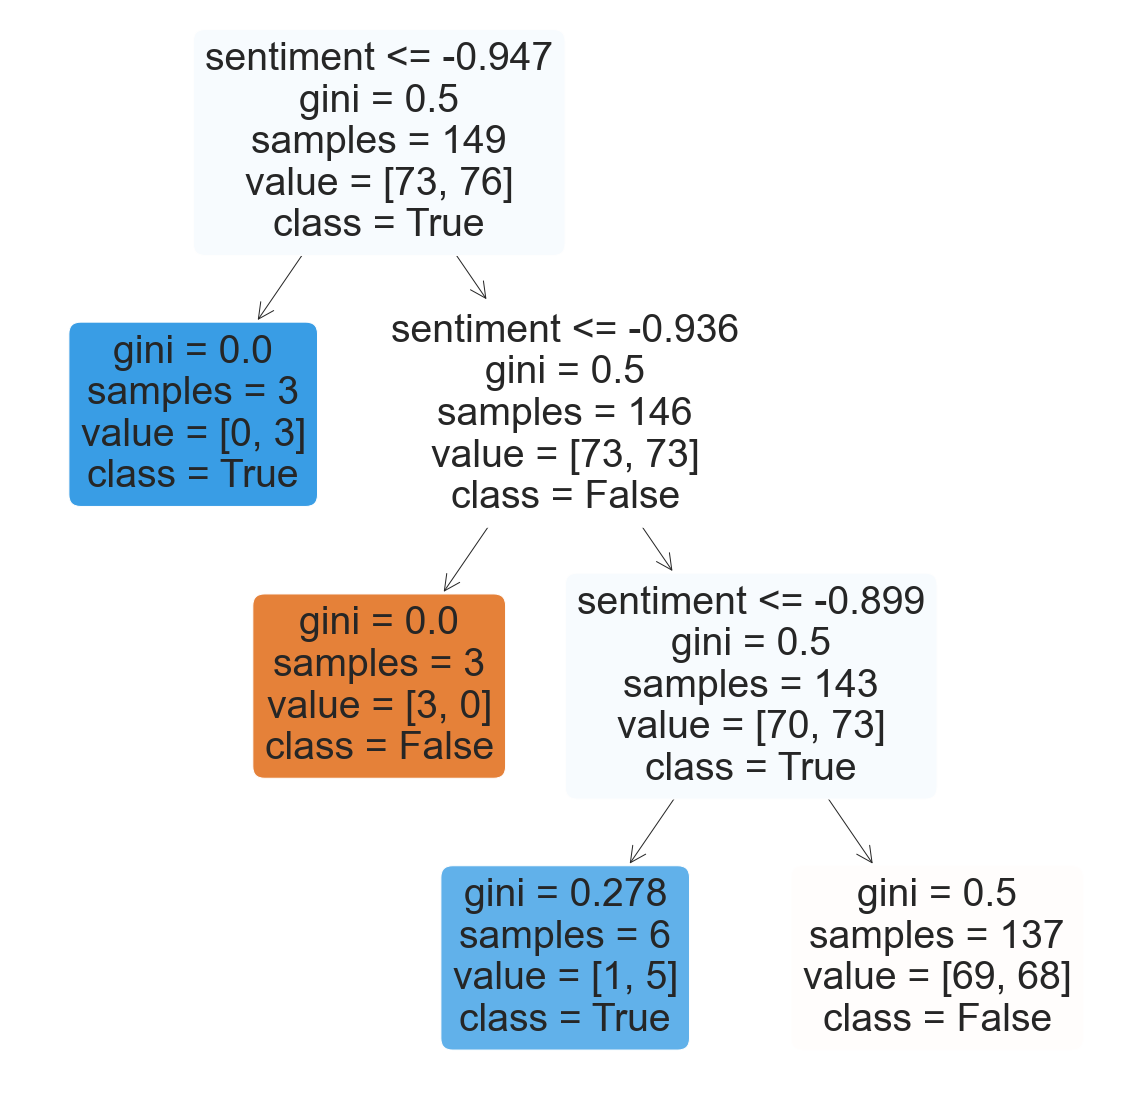

In [52]:
x_train, x_test, y_train, y_test = train_test_split(pd.DataFrame(stock_sntmt["sentiment"]), pd.DataFrame(stock_sntmt["increased"]), train_size=0.7, random_state = 0)
dectree = DecisionTreeClassifier(max_depth=3)
dectree.fit(x_train, y_train)
f = plt.figure(figsize=(20, 20))
plot_tree(dectree, filled=True, rounded=True, feature_names=["sentiment"], class_names=["False", "True"])

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Test Classification Accuracy 	: 0.46153846153846156
Train Classification Accuracy 	: 0.5369127516778524


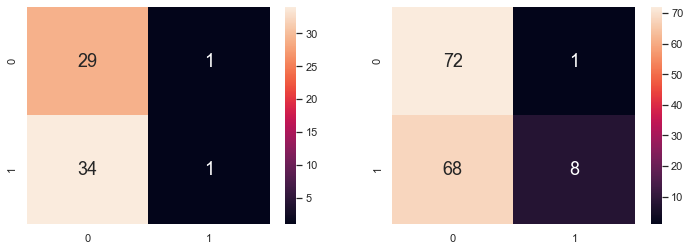

In [53]:
y_pred = dectree.predict(x_test)
y_pred_train = dectree.predict(x_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Test Classification Accuracy \t:", accuracy_score(y_test, y_pred))
print("Train Classification Accuracy \t:", accuracy_score(y_train, y_pred_train))

### Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\elvis\anacondafile\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB()

In [55]:
y_pred = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Test Classification Accuracy 	: 0.6
Train Classification Accuracy 	: 0.5369127516778524


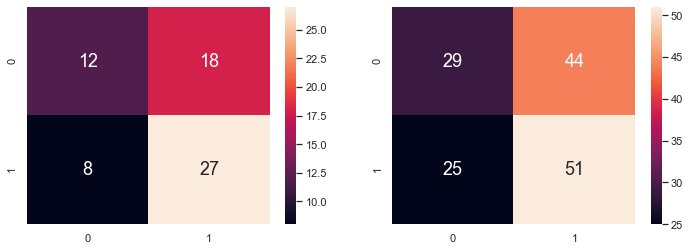

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Test Classification Accuracy \t:", accuracy_score(y_test, y_pred))
print("Train Classification Accuracy \t:", accuracy_score(y_train, y_pred_train))

### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
# Max depth reduced to 1 to prevent overfitting
classifier = RandomForestClassifier(random_state = 0,max_depth = 1)
classifier.fit(x_train, y_train)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-57-79f3f0b805a1>:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=1, random_state=0)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Test Classification Accuracy 	: 0.5538461538461539
Train Classification Accuracy 	: 0.5704697986577181


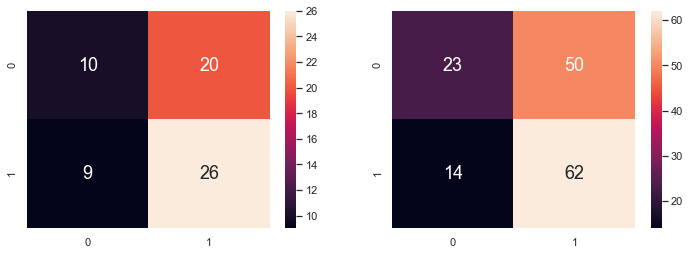

In [58]:
y_pred = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Test Classification Accuracy \t:", accuracy_score(y_test, y_pred))
print("Train Classification Accuracy \t:", accuracy_score(y_train, y_pred_train))

### K-Nearest Neighbors (K-NN)

In [59]:
x_train.shape

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(149, 1)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
#optimal number of neighbours is usually around square root of the number of samples
#square root of 127 is around 11, from there we checked what value gave us a better classification accuracy and stopped with 10
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train, y_train)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\elvis\anacondafile\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=10)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Test Classification Accuracy 	: 0.46153846153846156
Train Classification Accuracy 	: 0.6174496644295302


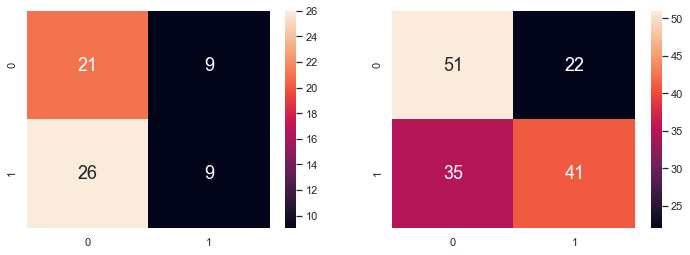

In [61]:
y_pred = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Test Classification Accuracy \t:", accuracy_score(y_test, y_pred))
print("Train Classification Accuracy \t:", accuracy_score(y_train, y_pred_train))

### Support Vector Machine (SVM)

In [62]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\elvis\anacondafile\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(kernel='linear', random_state=0)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Test Classification Accuracy 	: 0.6
Train Classification Accuracy 	: 0.5234899328859061


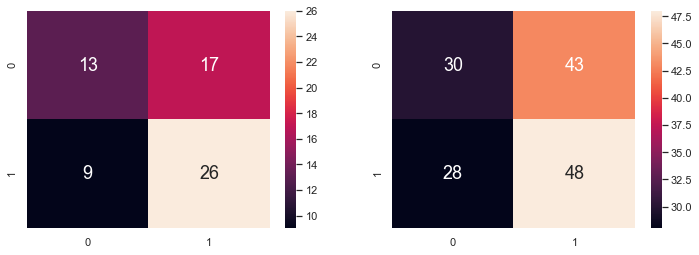

In [63]:
y_pred = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Test Classification Accuracy \t:", accuracy_score(y_test, y_pred))
print("Train Classification Accuracy \t:", accuracy_score(y_train, y_pred_train))

### Kernel SVM

In [64]:
classifier = SVC(random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\elvis\anacondafile\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(random_state=0)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Test Classification Accuracy 	: 0.6
Train Classification Accuracy 	: 0.5436241610738255


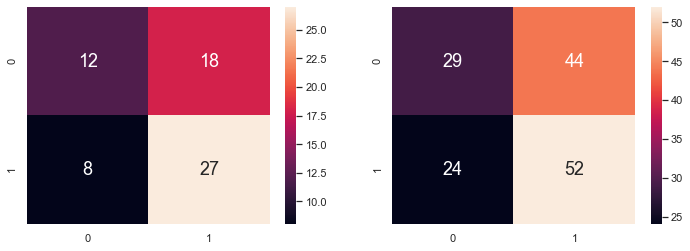

In [65]:
y_pred = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Test Classification Accuracy \t:", accuracy_score(y_test, y_pred))
print("Train Classification Accuracy \t:", accuracy_score(y_train, y_pred_train))

### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\elvis\anacondafile\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(random_state=0)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Test Classification Accuracy 	: 0.6
Train Classification Accuracy 	: 0.5369127516778524


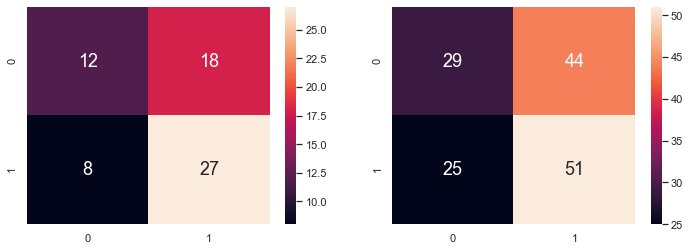

In [67]:
y_pred = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Test Classification Accuracy \t:", accuracy_score(y_test, y_pred))
print("Train Classification Accuracy \t:", accuracy_score(y_train, y_pred_train))

Here we see that our test classification accuracy have improved from the previous classifications, with all of the accuracies over 0.5 This shows that there has been an improvement in the classifications after doing the appropriate filtering. We will now proceed to test out whether Trump tweets's sentiment have a significant impact on the SPY stock price using 2 trading strategies.


The goal is to see whether trading while using the information provided by the tweet analysis will give us a higher profit than trading without such information. As of this point, we do not yet know if the tweets have a significant impact on the market.

Both trading strategies assumes that a highly positive sentiment value will increase stock price, while a highly negative sentiment value will decrease stock price and that there is no underlying costs involved other than the price of the stocks.

## Quantifying model accuracy

### Trading Strategy 1

Assuming that we only have enough money to buy 100 shares of stock, we will buy 100 shares of stock on the first day that trump tweeted during his presidency.
we will hold our shares till we come across a tweet with sentiment <-0.7. Then, we will sell all 100 shares. We will once again buy 100 shares of stock when the sentiment value is more than 0.7. This means that at any point in time, we will not have more than 100 shares of stock. The rationale is if trump's tweets were to have a siginificant impact on the SPY stock price as per our assumption, the best way to maximise profits is to buy all that we could if sentiment value is >0.7 and sell all if sentiment value is <-0.7. If there were remaining shares unsold, we will sell everything at the closing price on the last day of his tweet to obtain the profit

However, getting a profit from this does not immediately confirm that trump's tweets does have an impact. This is because of the upward trend of the stock price over the years. To confirm or reject our assumption, we would require a control where we buy and sell stocks at random. To ensure fairness in the comparison, we would buy and sell 100 shares of stock and also have the same number of buy/sell transactions. Since this is done at random, it is expected that the profit value obtained is volatile as well. As such, we have obtained the mean from 1000 attempts instead.

On the last day of his tweet, we will sell everything at the closing price to see the result

In [68]:
#buy 100 shares when its green and only sell when it turns red
#sell 100 shares when its red and only buy when it turns green
total_profit = 0
buy_or_sell = 1 #boolean
number_of_buys = 0
number_of_sells = 0
#buying my first 100 shares
total_profit -= trump_market['close'].iloc[0] * 100
print("Bought 100 share at opening price of",trump_market['close'].iloc[0],"per share")
number_of_buys +=1
for row in stock_sntmt.itertuples():
    if row.sentiment >= 0 and buy_or_sell == 0:
        total_profit -= row.open*100
        print("Bought 100 share at opening price of",row.open,"per share")
        buy_or_sell = 1
        number_of_buys+=1
    elif row.sentiment < 0 and buy_or_sell == 1:
        total_profit += row.close*100
        print("Sold 100 share at closing price of",row.close,"per share")
        buy_or_sell = 0
        number_of_sells+=1
        
#if the last transaction was a buy, everything will be sold at the closing price of trump's last day of tweet to compute profits
if(buy_or_sell):
    #selling based on the closing price on his last day of tweet
    total_profit += trump_market['close'].iloc[-1] * 100
    print("Sold 100 share at closing price of",trump_market['close'].iloc[-1],"per share")
    number_of_sells+=1
print("Total profit:"+"{:.2f}".format(total_profit))

Bought 100 share at opening price of 197.96 per share
Sold 100 share at closing price of 199.38 per share
Bought 100 share at opening price of 206.52 per share
Sold 100 share at closing price of 205.25 per share
Bought 100 share at opening price of 209.07 per share
Sold 100 share at closing price of 210.21 per share
Bought 100 share at opening price of 210.41 per share
Sold 100 share at closing price of 215.86 per share
Bought 100 share at opening price of 223.57 per share
Sold 100 share at closing price of 222.69 per share
Bought 100 share at opening price of 233.16 per share
Sold 100 share at closing price of 235.17 per share
Bought 100 share at opening price of 248.34 per share
Sold 100 share at closing price of 257.91 per share
Bought 100 share at opening price of 244.72 per share
Sold 100 share at closing price of 252.5 per share
Bought 100 share at opening price of 248.63 per share
Sold 100 share at closing price of 236.15 per share
Bought 100 share at opening price of 241.16 per

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [69]:
#randomly selling and buying the same number of times as previously
import random
#since the result is very random, the mean of 1000 attempts will be used
results = [] #list to contain all 1000 attempts
for i in range(1000):
    #this list is to determine whether to sell or buy, 1 for buying, 0 for selling
    random_list = [0,1]*(number_of_buys)
    if(not buy_or_sell):
        random_list.append(0)
    count_list = 0 #indexing
    #this list is to determine whether a transaction will happen or not, 1 for transaction, 0 for no transaction
    random_row_selection = [1]*(number_of_buys*2) +  (stock_sntmt.shape[0] - (number_of_buys*2))*[0]
    random.shuffle(random_row_selection)
    count_row_selection = 0 #indexing
    total_profit = 0
    #buying my first 100 shares
    total_profit -= trump_market['close'].iloc[0] * 100
    for row in stock_sntmt.itertuples():
        #determine whether a transaction will happen or not
        if(random_row_selection[count_row_selection]):
            #determine whether to sell or buy
            if random_list[count_list]:
                total_profit -= row.open*100
            elif random_list[count_list]==0:
                total_profit += row.close*100
            count_list+=1
        count_row_selection+=1
    #if the last transaction was a buy, everything is sold at the closing price of trump's last day of tweet to compute profits
    if(buy_or_sell):
        #selling based on the closing price on his last day of tweet
        total_profit += trump_market['close'].iloc[-1] * 100
    results.append(total_profit)
#Obtaining the mean profit from the 1000 results
print("Mean Profit =",sum(results)/len(results))

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Mean Profit = 5868.798000000001


In [70]:
#The Series contains the profit obtained for every attempt in the 1000 attempts
results_df = pd.Series(results)
results_df.describe()

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



count     1000.000000
mean      5868.798000
std       5043.743598
min      -9331.000000
25%       2390.750000
50%       5786.500000
75%       9362.250000
max      20264.000000
dtype: float64

In [71]:
results_df.quantile(0.98)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



15639.340000000026

As expected, we can see that the results are highly volatile, with a standard deviation of about twice the mean value.
The profit that we obtained being much higher than the mean, we can also see that it is slightly higher than the 98th percentile.


We can see that the maximum value is highly positive, much higher than the profit value we obtained from using trump's tweet, while the minimum value is highly negative. This shows that randomly purchasing and selling stocks is very risky.
When we followed trump's tweets' sentiments to buy stocks, it greatly reduced that risk and even allowed us to profit more than the mean value.

With this, we can conclude that trump's tweets did have an impact on stock price.

### Trading strategy 2

Assuming we have unlimited amount of money, we will buy 1 share of stock everytime the sentiment value is more than 0.7. We will sell the shares we hold when we come across a tweet with sentiment <-0.7. The rationale is that if we have unlimited amount of money, we would buy a stock everytime we get the information(trump tweets) that the stock price may continue to rise, and would sell all of the shares we own when we get the information that the stock price may drop. In this way, we make full use of the potential information provided by each tweet.

On the last day of his tweet, we will sell everything at the closing price to see the result

In [72]:
number_of_shares = 0 #number of shares owned
total_spent = 0 
total_spent_data = [] #list will later on be used for line graph comparison
total_value_data = [] #list will later on be used for line graph comparison
date_data = []
number_of_buys = 0
number_of_sells = 0
for row in stock_sntmt.itertuples():
    if row.sentiment >= 0:
        total_spent += row.open
        number_of_shares+= 1;
        #print("Bought 1 share at opening price of",row.open)
        number_of_buys+=1
    else:
        total_spent -= row.close*number_of_shares
        #print("Sold",number_of_shares, "shares at closing price of",row.close)
        number_of_shares = 0
        number_of_sells+=1
    total_spent_data.append(total_spent)
    total_value_data.append(number_of_shares*row.close)
    date_data.append(row.date)
print("Remaining number of shares unsold:",number_of_shares) #unsold shares will be sold at the closing price of trump's last day of tweet to compute profits
profit = number_of_shares*trump_market['close'].iloc[-1] - total_spent
print("Total Profit:"+"{:.2f}".format(profit))

Remaining number of shares unsold: 9
Total Profit:412.26


C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [73]:
#randomly pick n samples, where n = number of transactions that took place previously
number_of_transactions = stock_sntmt.shape[0]
random_stock = trump_market.sample(n = number_of_transactions)
random_stock

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



date    open   close  adjusted_close     volume  increased  \
238 2017-12-29  248.57  247.38      231.414976  2951804.0      False   
914 2020-09-08  278.82  275.42      272.307094  4780144.0      False   
48  2017-03-30  206.30  206.96      190.396704  2849212.0       True   
205 2017-11-10  234.45  234.43      218.277206  2507020.0      False   
829 2020-05-07  239.24  238.91      234.373650  3369035.0      False   
..         ...     ...     ...             ...        ...        ...   
413 2018-09-11  258.10  260.03      246.469114  3072921.0       True   
676 2019-09-27  269.58  267.99      259.653902  3170972.0      False   
89  2017-05-30  210.21  210.21      194.124712  1066624.0      False   
779 2020-02-26  271.99  269.74      263.649393  7468934.0      False   
4   2017-01-26  200.60  200.72      183.795533  3999710.0       True   

     prct_change  abs_prct_change  
238    -0.478738         0.478738  
914    -1.219425         1.219425  
48      0.319922         0.319922  
205    -0.008531         0.008531  
829    -0.137937         0.137937  
..           ...              ...  
413     0.747772         0.747772  
676    -0.589806         0.589806  
89      0.000000         0.000000  
779    -0.827236         0.827236  
4       0.059821         0.059821  

[214 rows x 8 columns]

In [74]:
random_stock.sort_values(by ='date', inplace=True)
random_stock.reset_index(inplace=True, drop= True)
random_stock

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



date    open   close  adjusted_close     volume  increased  \
0   2017-01-20  197.53  197.96      181.268252  6998974.0       True   
1   2017-01-23  197.86  197.78      181.103430  3249687.0      False   
2   2017-01-26  200.60  200.72      183.795533  3999710.0       True   
3   2017-01-31  198.72  198.36      181.634525  4628094.0      False   
4   2017-02-06  200.03  200.28      183.392633  2770903.0       True   
..         ...     ...     ...             ...        ...        ...   
209 2020-12-28  303.69  304.00      302.671769  2353830.0       True   
210 2020-12-29  305.43  303.46      302.134129  2319636.0      False   
211 2020-12-30  304.11  304.13      302.801201  2081348.0       True   
212 2021-01-05  301.93  303.84      302.512469  3355243.0       True   
213 2021-01-20  310.43  311.77      310.536268  2398402.0       True   

     prct_change  abs_prct_change  
0       0.217688         0.217688  
1      -0.040433         0.040433  
2       0.059821         0.059821  
3      -0.181159         0.181159  
4       0.124981         0.124981  
..           ...              ...  
209     0.102078         0.102078  
210    -0.644992         0.644992  
211     0.006577         0.006577  
212     0.632597         0.632597  
213     0.431659         0.431659  

[214 rows x 8 columns]

In [75]:
import random
profit_random_list = []
total_spent_data_random_list = []
total_value_data_random_list = []
for i in range(1000):
    number_of_shares_random = 0
    total_spent_random = 0
    count = 0 #indexing
    total_spent_data_random = [] #list will later on be used for line graph comparison
    total_value_data_random = [] #list will later on be used for line graph comparison
    #determine whether to buy or sell
    random_list = [1]*number_of_buys + [0]*(number_of_sells)
    random.shuffle(random_list)
    for row in random_stock.itertuples():
        #determine whether to buy or sell
        if random_list[count]:
            total_spent_random += row.open
            number_of_shares_random+= 1;
        else:
            total_spent_random -= row.close*number_of_shares_random
            number_of_shares_random = 0
        count+=1
        total_spent_data_random.append(total_spent_random)
        total_value_data_random.append(number_of_shares_random*row.close)
    profit_random = number_of_shares_random*trump_market['close'].iloc[-1] - total_spent_random
    profit_random_list.append(profit_random)
print("Mean Profit:"+"{:.2f}".format(sum(profit_random_list)/len(profit_random_list)))

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Mean Profit:165.47


In [76]:
profit_random_list_df = pd.Series(profit_random_list)
profit_random_list_df.describe()

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



count    1000.000000
mean      165.466810
std       177.122756
min      -619.360000
25%        68.005000
50%       170.610000
75%       278.675000
max       887.430000
dtype: float64

Similarly to trading strategy 1, we can see that the maximum and minimum is highly positive or negative respectively, with a high standard deviation value showing how randomly buying and selling stocks is highly risky. By following trump's tweets' sentiments, we are able to achieve a profit that is around the mean value.

Next, we will look at whether the selling signals(highly negative sentiment) from trump's tweets is accurate.

This can be observed by looking at the selling points in the graphs plotted below. The selling points(red dots) represents the points which we sold our shares and the expected profits show how much we would have profited if we had sold our shares at every point, as depicted by a line graph.

In [77]:
stock_value_df = pd.DataFrame(total_spent_data,columns=['Total Spent'])
stock_value_df["Total Value"] = pd.DataFrame(total_value_data,columns = ['Total Value'])
stock_value_df["Expected Profit"] = stock_value_df["Total Value"] - stock_value_df["Total Spent"]
stock_value_df["Date"] = pd.DataFrame(date_data,columns = ['Date'])
stock_value_df.head(30)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Total Spent  Total Value  Expected Profit       Date
0        197.53       197.96             0.43 2017-01-20
1         -1.85         0.00             1.85 2017-01-30
2         -1.85         0.00             1.85 2017-02-07
3         -1.85         0.00             1.85 2017-03-13
4        204.67       206.25             1.58 2017-04-03
5         -0.58         0.00             0.58 2017-04-21
6        208.49       209.77             1.28 2017-05-05
7         -1.72         0.00             1.72 2017-05-30
8        208.69       210.00             1.31 2017-05-31
9        423.67       430.46             6.79 2017-07-12
10        -8.05         0.00             8.05 2017-07-25
11       215.52       223.90             8.38 2017-09-20
12        -7.17         0.00             7.17 2017-09-26
13        -7.17         0.00             7.17 2017-10-11
14        -7.17         0.00             7.17 2017-10-24
15        -7.17         0.00             7.17 2017-11-09
16       225.99       232.96             6.97 2017-11-15
17        -9.18         0.00             9.18 2017-11-22
18        -9.18         0.00             9.18 2017-12-14
19       239.16       248.02             8.86 2018-01-02
20       487.48       497.90            10.42 2018-01-03
21       -28.34         0.00            28.34 2018-01-12
22       216.38       246.57            30.19 2018-02-13
23       -36.12         0.00            36.12 2018-02-15
24       212.51       249.49            36.98 2018-02-22
25       456.06       490.70            34.64 2018-03-02
26       -16.24         0.00            16.24 2018-04-02
27       224.92       239.73            14.81 2018-04-09
28       472.80       494.76            21.96 2018-04-18
29       714.23       729.36            15.13 2018-04-26

In [78]:
sell_points = stock_value_df[stock_value_df["Total Value"] == 0]
sell_points

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Total Spent  Total Value  Expected Profit       Date
1          -1.85          0.0             1.85 2017-01-30
2          -1.85          0.0             1.85 2017-02-07
3          -1.85          0.0             1.85 2017-03-13
5          -0.58          0.0             0.58 2017-04-21
7          -1.72          0.0             1.72 2017-05-30
..           ...          ...              ...        ...
199      -168.08          0.0           168.08 2020-09-01
200      -168.08          0.0           168.08 2020-09-03
201      -168.08          0.0           168.08 2020-09-10
203      -179.33          0.0           179.33 2020-10-07
204      -179.33          0.0           179.33 2020-10-09

[80 rows x 4 columns]

In [79]:
stock_value_df_random = pd.DataFrame(total_spent_data_random,columns=['Total Spent'])
stock_value_df_random["Total Value"] = pd.DataFrame(total_value_data_random,columns = ['Total Value'])
stock_value_df_random["Expected Profit"] = stock_value_df_random["Total Value"] - stock_value_df_random["Total Spent"]
stock_value_df_random["Date"] = random_stock["date"]
stock_value_df_random

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Total Spent  Total Value  Expected Profit       Date
0           0.00         0.00             0.00 2017-01-20
1           0.00         0.00             0.00 2017-01-23
2         200.60       200.72             0.12 2017-01-26
3         399.32       396.72            -2.60 2017-01-31
4         599.35       600.84             1.49 2017-02-06
..           ...          ...              ...        ...
209       107.52       304.00           196.48 2020-12-28
210       412.95       606.92           193.97 2020-12-29
211      -195.31         0.00           195.31 2020-12-30
212       106.62       303.84           197.22 2021-01-05
213      -205.15         0.00           205.15 2021-01-20

[214 rows x 4 columns]

In [80]:
sell_points_random = stock_value_df_random[stock_value_df_random["Total Value"] == 0]
sell_points_random

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Total Spent  Total Value  Expected Profit       Date
0           0.00          0.0             0.00 2017-01-20
1           0.00          0.0             0.00 2017-01-23
7         -36.09          0.0            36.09 2017-02-24
10        -36.70          0.0            36.70 2017-03-10
13        -39.51          0.0            39.51 2017-03-30
..           ...          ...              ...        ...
203      -186.93          0.0           186.93 2020-11-13
206      -193.68          0.0           193.68 2020-12-18
208      -196.17          0.0           196.17 2020-12-23
211      -195.31          0.0           195.31 2020-12-30
213      -205.15          0.0           205.15 2021-01-20

[80 rows x 4 columns]

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0.5, 1.0, "Stock trading based on Trump's Tweets")

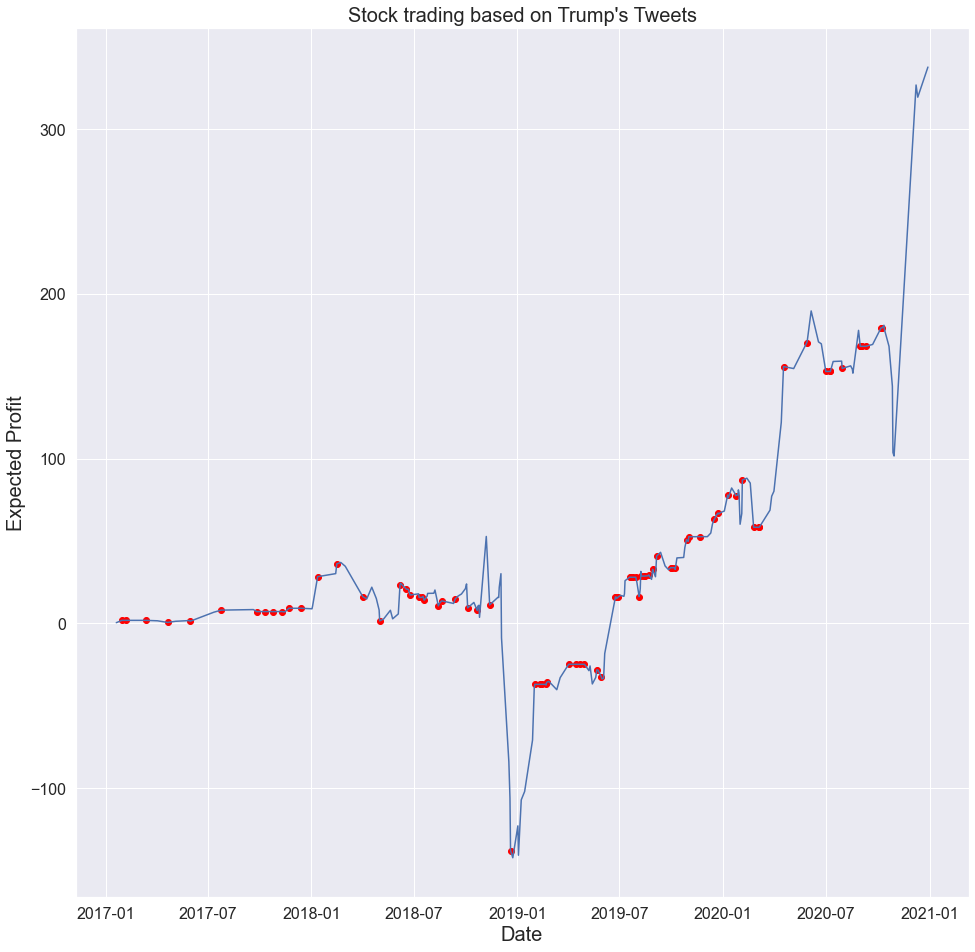

In [81]:
#red dots represent the selling points
f = plt.figure(figsize=(16, 16))
number_of_transactions = stock_sntmt.shape[0]
x = stock_value_df['Date']
x_sell_points = sell_points['Date']
plt.plot(x, stock_value_df["Expected Profit"], label = "Expected Profit")
plt.scatter(x_sell_points, sell_points["Expected Profit"],c='red')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Expected Profit', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title("Stock trading based on Trump's Tweets", fontsize = 20)

C:\Users\elvis\anacondafile\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0.5, 1.0, 'Stock trading randomly')

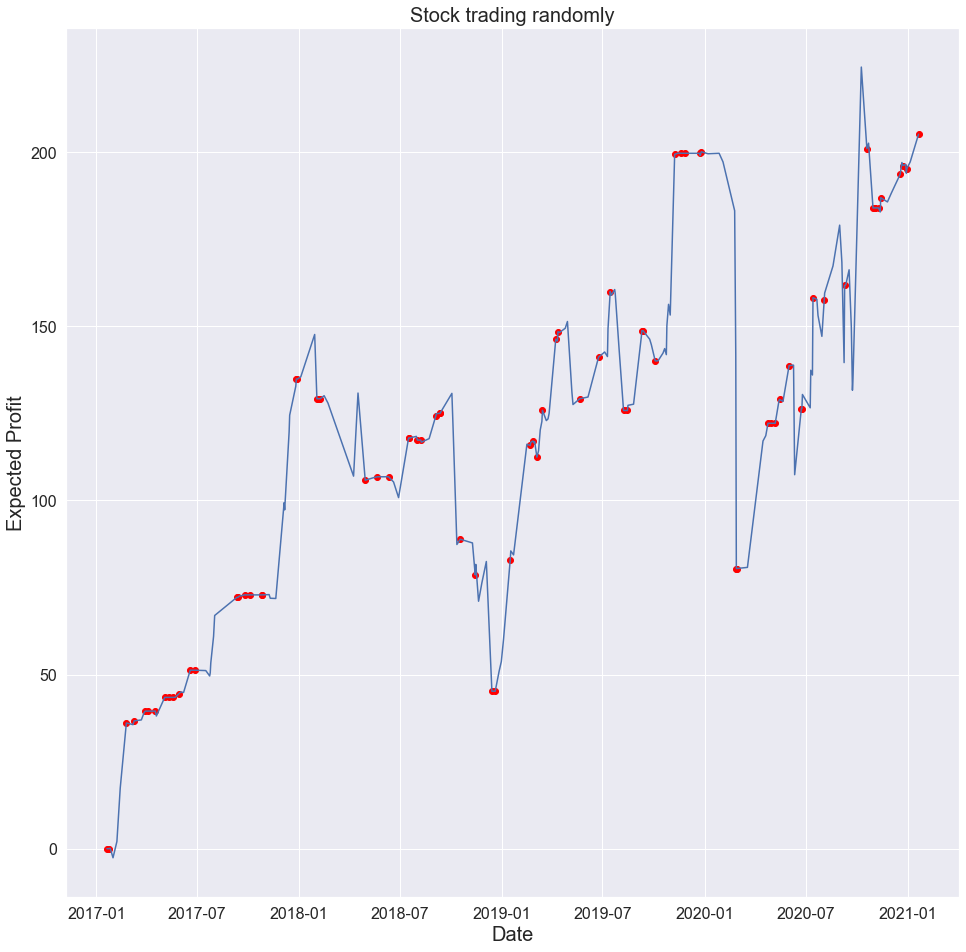

In [82]:
#red dots represent the selling points
f = plt.figure(figsize=(16, 16))
x = stock_value_df_random['Date']
x_sell_points_random = sell_points_random["Date"]
plt.plot(x, stock_value_df_random["Expected Profit"], label = "Expected Profit")
plt.scatter(x_sell_points_random, sell_points_random["Expected Profit"],c='red')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Expected Profit', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title("Stock trading randomly", fontsize = 20)

We can see that by following trump's tweets' sentiments, we are able to mostly sell at a good price to maximise profits

On the other hand, when we randomly sold the stocks, there are multiple instances where stocks are sold at the poor timings

In conclusion, we can see from the 2 trading strategies that trump's tweets does have an observable impact on stock prices

Acknowledgements:

https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing

https://www.udemy.com/course/machinelearning/